# Exercise 1 : Fraudulent Transactions (Classification)

### Import Librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import scipy as sp
from scipy.stats import norm
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from collections import Counter
import collections

%matplotlib inline

# Load Dataset & Check Basic Metadata 

In [2]:
df = pd.read_csv("fraud_prep.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#Check for missing values
df.isnull().sum().max()

0

###### => There are no missing values, and there are only 2 features not derived from pca analysis: time and amount

# Exploratory Data Analysis

In [8]:
print('No Frauds :', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% |', df['Class'].value_counts()[0])
print('Frauds    :', round(df['Class'].value_counts()[1]/len(df) * 100,2), ' % |', df['Class'].value_counts()[1])

No Frauds : 99.83 % | 284315
Frauds    : 0.17  % | 492


Text(0, 0.5, 'Count')

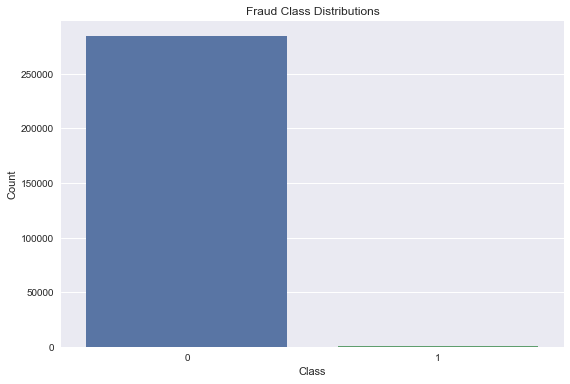

In [9]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(9,6)})
p = sns.countplot('Class', data=df)
plt.title('Fraud Class Distributions')
plt.xlabel("Class")
plt.ylabel("Count")

###### => Highly Imbalanced Dataset: We need to pay a particular attention to the fact that a fraud transaction is a rare event (anomaly) and apply specific techniques to tackle this issue

Time and Amount are the only 2 Features that are not resulting from the PCA performed on the original dataset. A deep understanding of these two features may help us gain more insight about data. 

### Time Feature
Before starting let's convert the time from seconds to hours to ease the interpretation.

In [10]:
df.loc[:,'Time'] = df.Time / 3600

(0, 48)

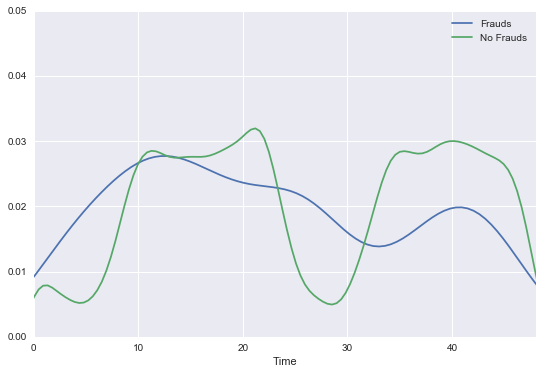

In [11]:
_ = sns.distplot(df.Time[df.Class == 1], label='Frauds', hist = False);
_ = sns.distplot(df.Time[df.Class == 0], label='No Frauds', hist = False).set(ylim=(0, .05))
plt.xlim([0,48])

###### => Perhaps the only thing to notice here is that the drop in non fraudulent transactions a little after 1 day is  due to the nighttime. However, Fraudulent transactions appear to decrease less at this time

Text(0.5, 1.0, 'Distribution of Transaction Time')

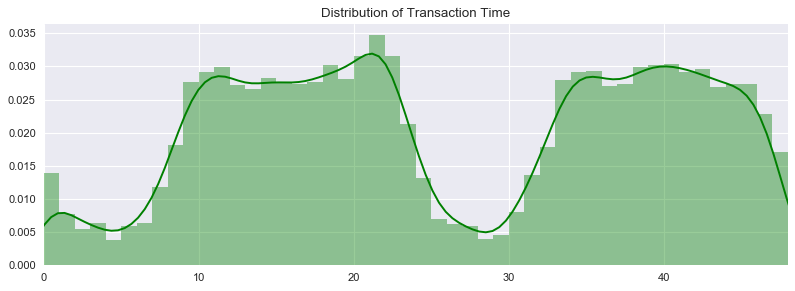

In [12]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df['Time'].values, bins=48, color='g')
plt.xlim([0,48])
plt.title('Distribution of Transaction Time')

In [13]:
print("Time:")
print("Skewness: %f" % df['Time'].skew())
print("Kurtosis: %f" % df['Time'].kurt())

Time:
Skewness: -0.035568
Kurtosis: -1.293530


### Amount Feature

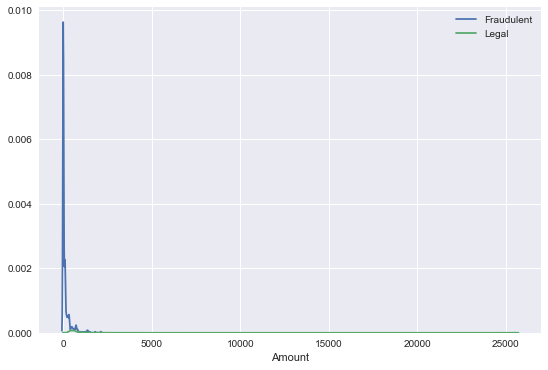

In [14]:
sns.distplot(df.Amount[df.Class == 1], label='Fraudulent', hist = False);
sns.distplot(df.Amount[df.Class == 0], label='Legal', hist = False);

###### => Fraudulent transactions appear to occur at a far higher rate at low values than legal transactions. Amount may be a useful feature in determining if a transaction is fraud if we ommit the fact that a fraudulent transactions is rare (i.e. may be useful after balancing the dataset). 

Text(0.5, 1.0, 'Distribution of Transaction Time')

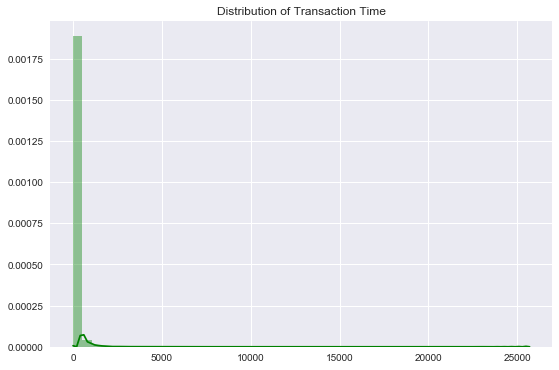

In [15]:
sns.distplot(df['Amount'].values, color='g')
plt.title('Distribution of Transaction Time')

The histogram is hard to read due to some outliers we can't see. A boxplot will show the outliers:

Text(0.5, 1.0, 'Transaction Amounts')

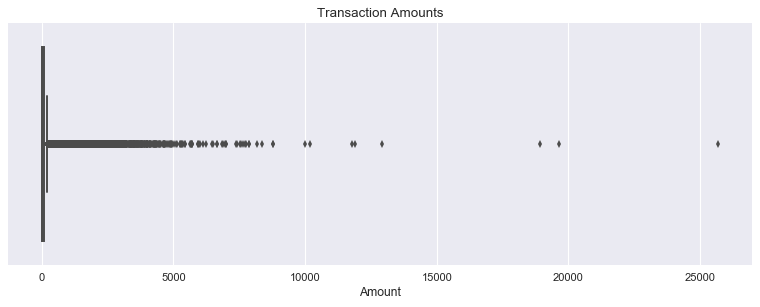

In [16]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(df['Amount'])
plt.title('Transaction Amounts')

In [17]:
#skewness and kurtosis of Time and Amount on training Set
print("Time:")
print("Skewness: %f" % df['Time'].skew())
print("Kurtosis: %f" % df['Time'].kurt())
print("--------------------")
print("Amount:")
print("Skewness: %f" % df['Amount'].skew())
print("Kurtosis: %f" % df['Amount'].kurt())

Time:
Skewness: -0.035568
Kurtosis: -1.293530
--------------------
Amount:
Skewness: 16.977724
Kurtosis: 845.092646


###### => We can easily notice that the Amount feature has a strong right skew. Let's use a power transform to bring the transaction amounts closer to a normal distribution.

Befor applying any kind of transformation to fix this skewness issue, we will split our data in Train/Test to avoid data leakage

In [18]:
# Train/Test Split
X = df.drop(labels='Class', axis=1)
y = df.loc[:,'Class']

We'll use a test size of 20%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [20]:
X_train['Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(X_train['Amount'] + 1, alpha=0.01)

Text(0, 0.5, 'Count')

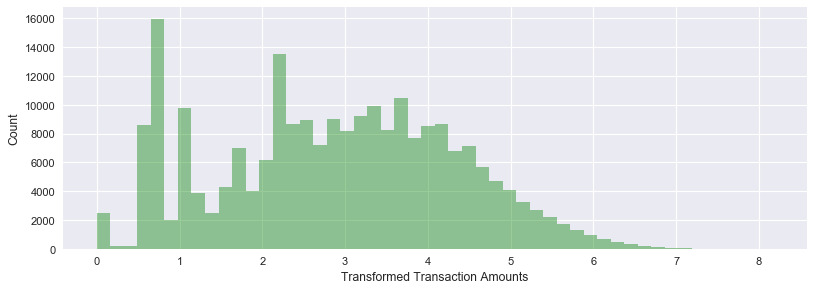

In [21]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], color='g', kde=False)
plt.xlabel('Transformed Transaction Amounts')
plt.ylabel('Count')

In [22]:
print("Transformed Amount on Training Set:")
print("Skewness: %f" % X_train['Amount'].skew())
print("Kurtosis: %f" % X_train['Amount'].kurt())

Transformed Amount on Training Set:
Skewness: 0.018286
Kurtosis: -0.759369


The maximum likelihood estimate of $\lambda$ in the Box-Cox transform:

In [23]:
maxlog

-0.04446182087525254

In [24]:
(min_ci, max_ci)

(-0.04760712277040383, -0.04131942902773879)

In [25]:
X_test['Amount'] = X_test['Amount'] + 1
X_test['Amount'], maxlog, (min_ci, max_ci)  = sp.stats.boxcox(X_test['Amount'], alpha=maxlog)

Text(0, 0.5, 'Count')

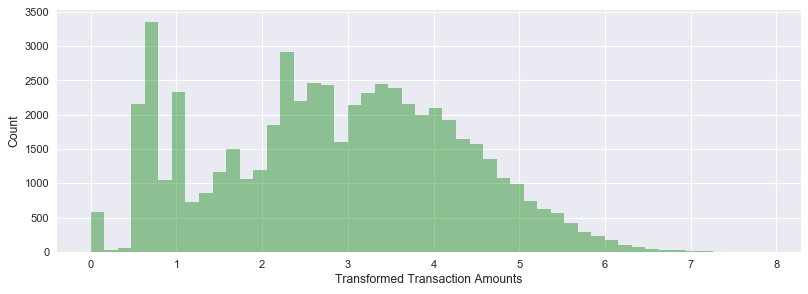

In [26]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_test['Amount'], color='g', kde=False)
plt.xlabel('Transformed Transaction Amounts')
plt.ylabel('Count')

Before moving forward, we will check if there is a relationship between the transaction amounts and the time of day? Let's explore this question with a joint histogram using hexagonal bins.

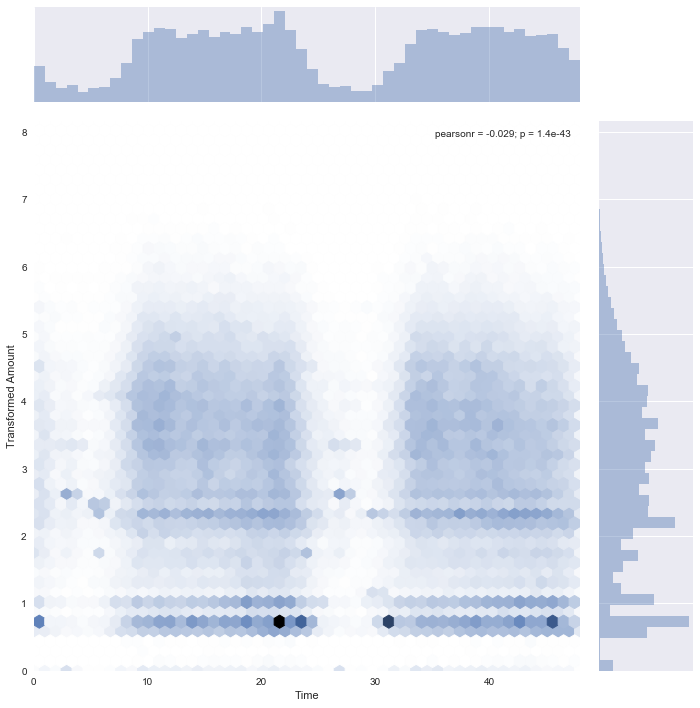

In [27]:
sns.jointplot(X_train['Time'], X_train['Amount'], kind='hex', size=10).set_axis_labels('Time','Transformed Amount')

Nothing too useful here.

### Now it's time to look on our pricipal components (V1, ...,V28)

In [28]:
PCAfeat = X_train.drop(['Amount', 'Time'], axis=1)

In [29]:
PCAfeat.shape

(227845, 28)

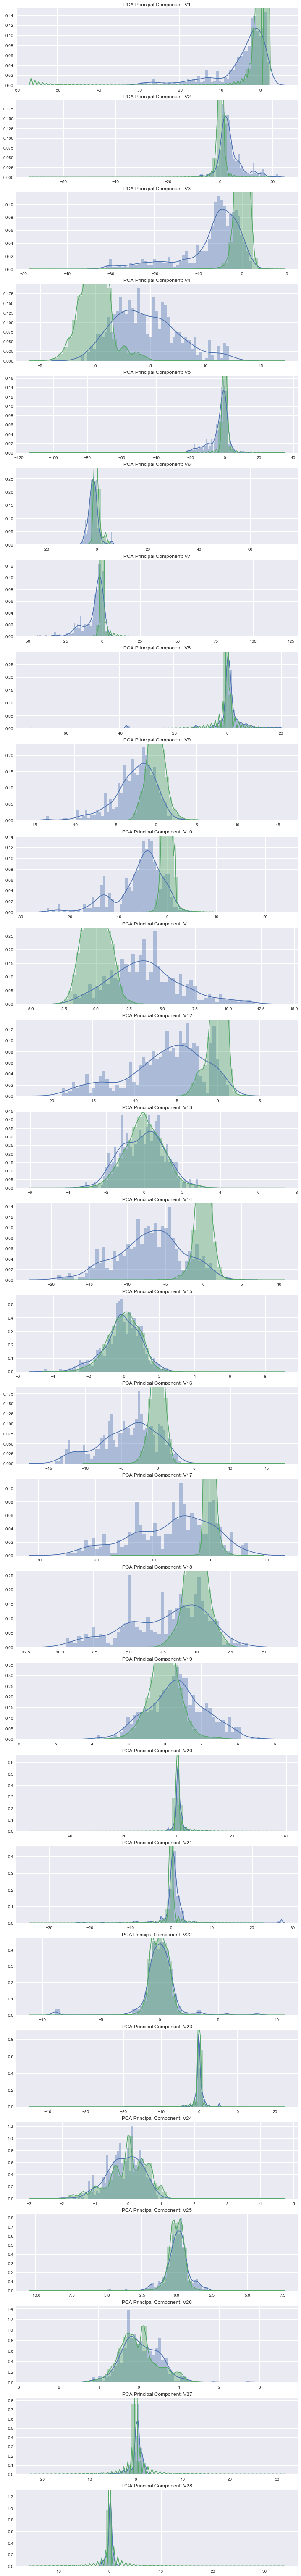

In [30]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(PCAfeat):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('PCA Principal Component: ' + str(cn))

Text(0.5, 1.0, 'V1-V28 Means')

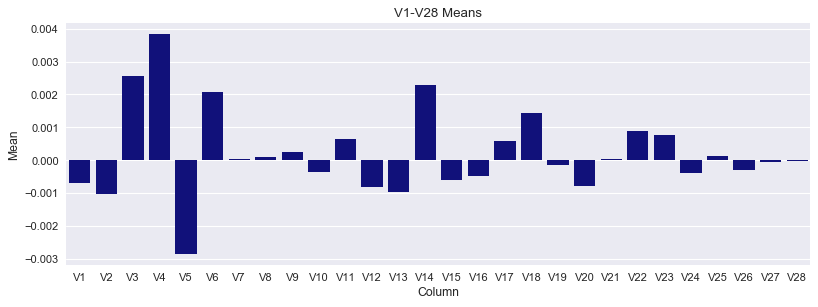

In [31]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=PCAfeat.columns, y=PCAfeat.mean(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

### Correlation Matrix

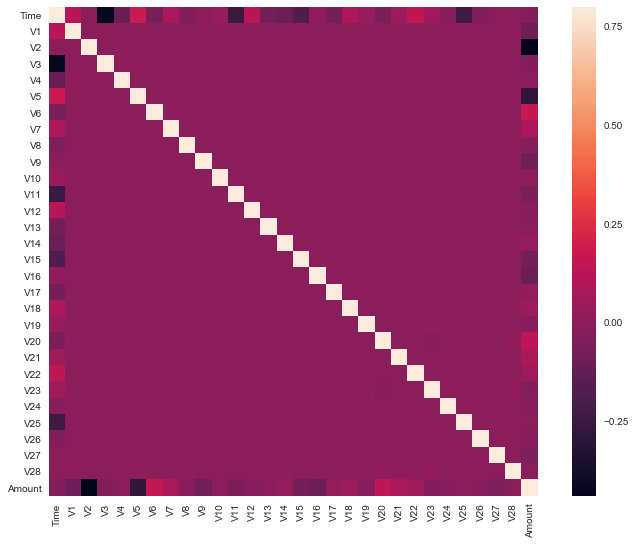

In [32]:
corr = X_train.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corr,vmax=0.8,square = True)

=> The above correlation matrix shows that none of the V1 to V28 features have any correlation which is obvious since they have been obtained after performing PCA. 

=> However if we observe Class has some form <b>positive and negative correlations with the V components but has no interesting correlation with Time and Amount</b>.

# Models building

Now it's time to build our classifier models. To do this, we will be implementing two strategies: the first one without adjusting the class distribution of our data set (i.e. the ratio between the fraudulent and legal classes) and the second with applying undersampling technique.

## 1. Straightforward Approach (Stratified Unbalanced Dataset)

Now we're ready to build machine learning models to predict whether a transaction is fraudulent. We'll train the following models:

Logistic regression, Support vector classifier and Random forest

### Logistic Regression and Support Vector Classifier

We'll implement the model as a machine learning pipeline that includes StandardScaler for data standardization (rescaling each variable to zero mean and unit variance).

In [33]:
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

SGDClassifier estimator implements regularized linear models (using either the squared euclidean norm L2 or the absolute norm L1) with stochastic gradient descent (SGD) learning:

In [34]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

The grid search, implemented by GridSearchCV, uses StratifiedKFold with 5 folds for the train/validation splits. 

In [35]:
MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, 
                        pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

Matthews correlation coefficient (MCC) takes into account true and false positives and negatives and is generally useful when the classes are of very different sizes.

In [36]:
grid_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=False, with_mean=True, with_std=True)), ('model', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=0.001, verbose=0, warm_start=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'model__loss': ['log'], 'model__penalty': ['l1', 'l2'], 'model__alpha': array([1.00000e-03, 2.06914e-03, 4.28133e-03, 8.85867e-03, 1.83298e-02,
       3.79269e-02, 7.84760e-02, 1.62378e-01, 3.35982e-01, 6.95193e-01,
       1.43845e+00, 2.97635e+00, 6.15848e+00, 1.27427e+01, 2.63665e+01,...1, 1.12884e+02, 2.33572e+02, 4.83293e+02, 1.00000e+03]), 'model__class_weight': [None, 'balanced']}],
       pre_dispatch='2*n_jobs', refit=True, re

In [37]:
grid_sgd.best_score_

0.8086261086397736

In [38]:
grid_sgd.best_params_

{'model__alpha': 483.2930238571752,
 'model__class_weight': 'balanced',
 'model__loss': 'hinge'}

### Random Forest Classifier

Tree-based predictors do not require any scaling of numerical features. Then, our pipeline will contain only th Random Forest algorithm.

In [39]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

The random forest takes much longer to train on this fairly large dataset, so we don't actually do a hyperparameter grid search, only specifiying the number of estimators.

In [40]:
param_grid_rf = {'model__n_estimators': [100]}
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [41]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'model__n_estimators': [100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=False,
       scoring=make_scorer(matthews_corrcoef), verbose=1)

In [42]:
grid_rf.best_score_

0.8553005528833479

The random forest performed much better than the linear SVC even without any kind of hyperparameter tuning.

### Test Set Evaluation of the Best Model

According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.

In [43]:
def classification_eval(estimator, X_test, y_test):

    y_pred = estimator.predict(X_test)
    
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test, y_pred), '\n')
    
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred, digits=5))
    
    print('SCALAR METRIC')
    format_str = '%%13s = %%.%if' % 5
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))

In [44]:
classification_eval(grid_sgd, X_test, y_test)

CONFUSION MATRIX
[[56849    15]
 [   13    85]] 

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0    0.99977   0.99974   0.99975     56864
          1    0.85000   0.86735   0.85859        98

avg / total    0.99951   0.99951   0.99951     56962

SCALAR METRIC
          MCC = 0.85838


In [45]:
classification_eval(grid_rf, X_test, y_test)

CONFUSION MATRIX
[[56858     6]
 [   15    83]] 

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0    0.99974   0.99989   0.99982     56864
          1    0.93258   0.84694   0.88770        98

avg / total    0.99962   0.99963   0.99962     56962

SCALAR METRIC
          MCC = 0.88855


## 2. Undersampling Approach

In [46]:
df.shape

(284807, 31)

In [47]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [48]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1)

In [49]:
shuffled_df.shape

(284807, 31)

In [50]:
# Put all the fraud rows in a separate dataframe.
fraud_df = shuffled_df.loc[shuffled_df['Class'] == 1]

In [51]:
fraud_df.shape

(492, 31)

In [52]:
#Randomly select 492 observations from the non-fraud (majority class)
non_fraud_df = shuffled_df.loc[shuffled_df['Class'] == 0].sample(n=fraud_df.shape[0])

In [53]:
non_fraud_df.shape

(492, 31)

In [54]:
# Concatenate both dataframes again
new_df = pd.concat([fraud_df, non_fraud_df])

In [55]:
new_df.shape

(984, 31)

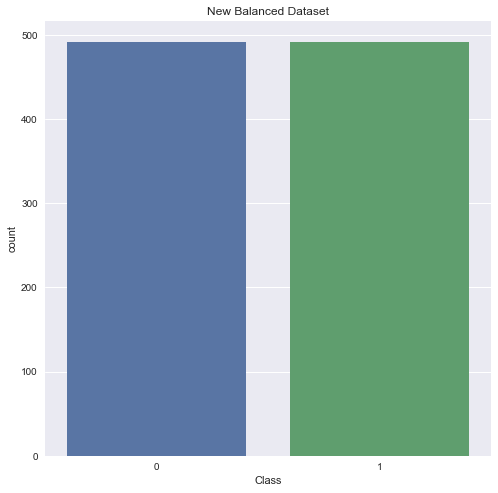

In [56]:
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Class', data=new_df)
plt.title('New Balanced Dataset')
plt.show()

### 2.1 Undersampling before cross validating (prone to overfit)

In [57]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
# Let's implement simple classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [60]:
#before applying hyperparameter tuning
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 85.0 % accuracy score
Classifiers:  SVC Has a training score of 86.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


In [61]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

In [62]:
# KNN
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

In [63]:
# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

In [64]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

In [65]:
# Overfitting Case
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  95.68%
Knears Neighbors Cross Validation Score 87.29%
Support Vector Classifier Cross Validation Score 94.28%
DecisionTree Classifier Cross Validation Score 94.91%


In [66]:
#Logistic Regression
classification_eval(log_reg, X_test, y_test)

CONFUSION MATRIX
[[80  2]
 [18 97]] 

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0    0.81633   0.97561   0.88889        82
          1    0.97980   0.84348   0.90654       115

avg / total    0.91175   0.89848   0.89919       197

SCALAR METRIC
          MCC = 0.80752


In [67]:
#Knears Neighbors
classification_eval(knears_neighbors, X_test, y_test)

CONFUSION MATRIX
[[81  1]
 [36 79]] 

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0    0.69231   0.98780   0.81407        82
          1    0.98750   0.68696   0.81026       115

avg / total    0.86463   0.81218   0.81184       197

SCALAR METRIC
          MCC = 0.67728


In [68]:
#Support Vector Classifier
classification_eval(svc, X_test, y_test)

CONFUSION MATRIX
[[80  2]
 [17 98]] 

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0    0.82474   0.97561   0.89385        82
          1    0.98000   0.85217   0.91163       115

avg / total    0.91537   0.90355   0.90423       197

SCALAR METRIC
          MCC = 0.81618


In [69]:
#Decision Tree Classifier
classification_eval(tree_clf, X_test, y_test)

CONFUSION MATRIX
[[79  3]
 [25 90]] 

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0    0.75962   0.96341   0.84946        82
          1    0.96774   0.78261   0.86538       115

avg / total    0.88111   0.85787   0.85876       197

SCALAR METRIC
          MCC = 0.73663


### 2.2 Undersampling during cross validating

In [70]:
X = df.drop('Class', axis=1)
y = df['Class']
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

In [71]:
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

In [72]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fold = 0
print("---------------------------------------------------------------------------------------------------------------")
for train_index, test_index in sss.split(undersample_X, undersample_y):
    fold = fold + 1
    print("Fold:", fold)
    print("Train:", train_index, "|| Test:", test_index)
    print("---------------------------------------------------------------------------------------------------------------")
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

---------------------------------------------------------------------------------------------------------------
Fold: 1
Train: [ 30473  30496  31002 ... 284804 284805 284806] || Test: [    0     1     2 ... 57017 57018 57019]
---------------------------------------------------------------------------------------------------------------
Fold: 2
Train: [     0      1      2 ... 284804 284805 284806] || Test: [ 30473  30496  31002 ... 113964 113965 113966]
---------------------------------------------------------------------------------------------------------------
Fold: 3
Train: [     0      1      2 ... 284804 284805 284806] || Test: [ 81609  82400  83053 ... 170946 170947 170948]
---------------------------------------------------------------------------------------------------------------
Fold: 4
Train: [     0      1      2 ... 284804 284805 284806] || Test: [150654 150660 150661 ... 227866 227867 227868]
------------------------------------------------------------------------------

In [73]:
# Turn into an array
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [74]:
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
# Cross Validation
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(ratio='majority'), log_reg)
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

In [75]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/rabehayari/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

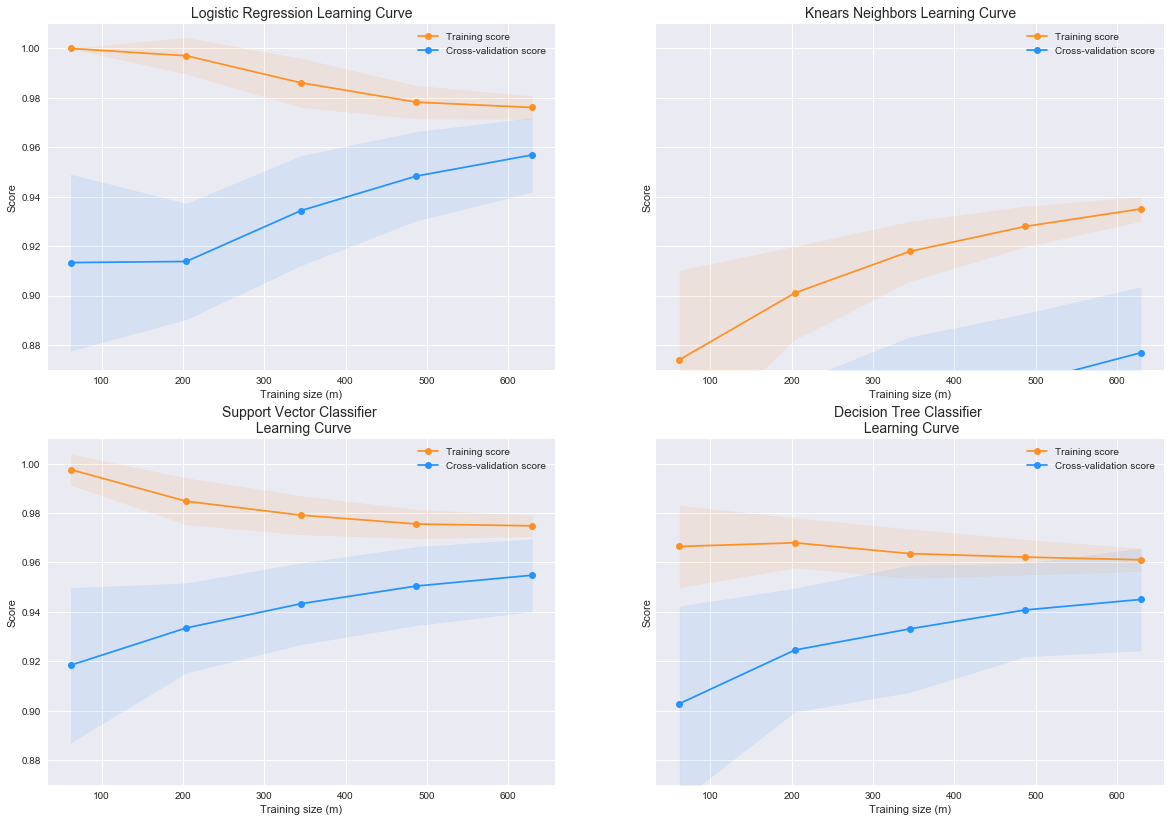

In [76]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [77]:
#Support Vector Classifier
classification_eval(svc, undersample_Xtest, undersample_ytest)

CONFUSION MATRIX
[[55043  1820]
 [   10    88]] 

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0    0.99982   0.96799   0.98365     56863
          1    0.04612   0.89796   0.08774        98

avg / total    0.99818   0.96787   0.98211     56961

SCALAR METRIC
          MCC = 0.19945


###### Here we evaluated, as an example, the capabilities of our Support Vector Classifier on fully unseen data from the original distribution where we are dealing with highly imbalanced stratified test set after applying random undersampling. Our model succeeded to reach a recall of 88%. Financial companies don't want to miss catching fraud (FN), therefore recall can be considered as the most important metric to evaluate. 

It is worth to mention here that our evaluation to this point point can be a little bit naive and deeper understanding of our model may help us to identify the right directions for future exploration by looking in the precision-recall courbe, the Receiver Operating Characteristic of the different classifiers, apply more sophisticated classifier (XGBoostClassifier, etc.). Also, implementing an oversampling approach such as SMOTE (Synthetic Minority Over-sampling Technique).

### BONUS Points : Can you think of some unsupervised methods to accomplish this same task? If so, describe them (do not script them) 

Identifying fraudulent transactions among legal ones is one of the most known applications of anomaly detection techniques, mainly, looking for unusual patterns that fails to conform to a group of properties exhibited by larger collections of such observations. 

One fundamental capability for data-stream learning (a.k.a. online learning) is to model each stream in an unsupervised fashion and detect unusual, anomalous behaviors in real-time. Early anomaly detection is highly valuable in the context of detecting fraudulent transactions. 

Therefore, the most suitable techniques to tackle our task consists on the use of data-stream clustering algorithms. Data-stream clustering is a useful and ubiquitous tool in data analysis that assigns on the fly incoming data into
groups whose members present higher degree of similarity than others.

A series of data-stream clustering algorithms have been developed in literature. However, I will tell you about a completely new unsupervised online clustering technique that has been proposed a part of my PhD thesis called DeDaSC.


<B>PS:</B> Other static methods based on anomaly detection could be explored such as <b>Isolation Forest and One-Class SVM</b>. 

### DeDaSC: Delaunay triangulation-based Data Stream Clustering algorithm

In information retrieval, the intrinsic nature of data stream clustering requires computationally and memory effective incremental processing of incoming data streams. DeDaSC is able to construct arbitrary shaped clusters in real-time without prior knowledge of the number of clusters. DeDaSC requires only the newly arrived data, not the entire dataset, to be saved in memory. An incremental Delaunay triangulation is introduced to guarantee the effectiveness of the neighborhood discovery with limited computation time and memory.

In the figure below, we describe the main workflow of DeDaSC where every incoming data sample is instantly clustered and outliers are easily identified. Such approach maintains arbitrary shaped data space regions of global clusters online. Then, in the second figure, we show the final findings of our algorithm. The final clustering results obtained by DeDaSC are shown in Figures (j), (k) and (l).

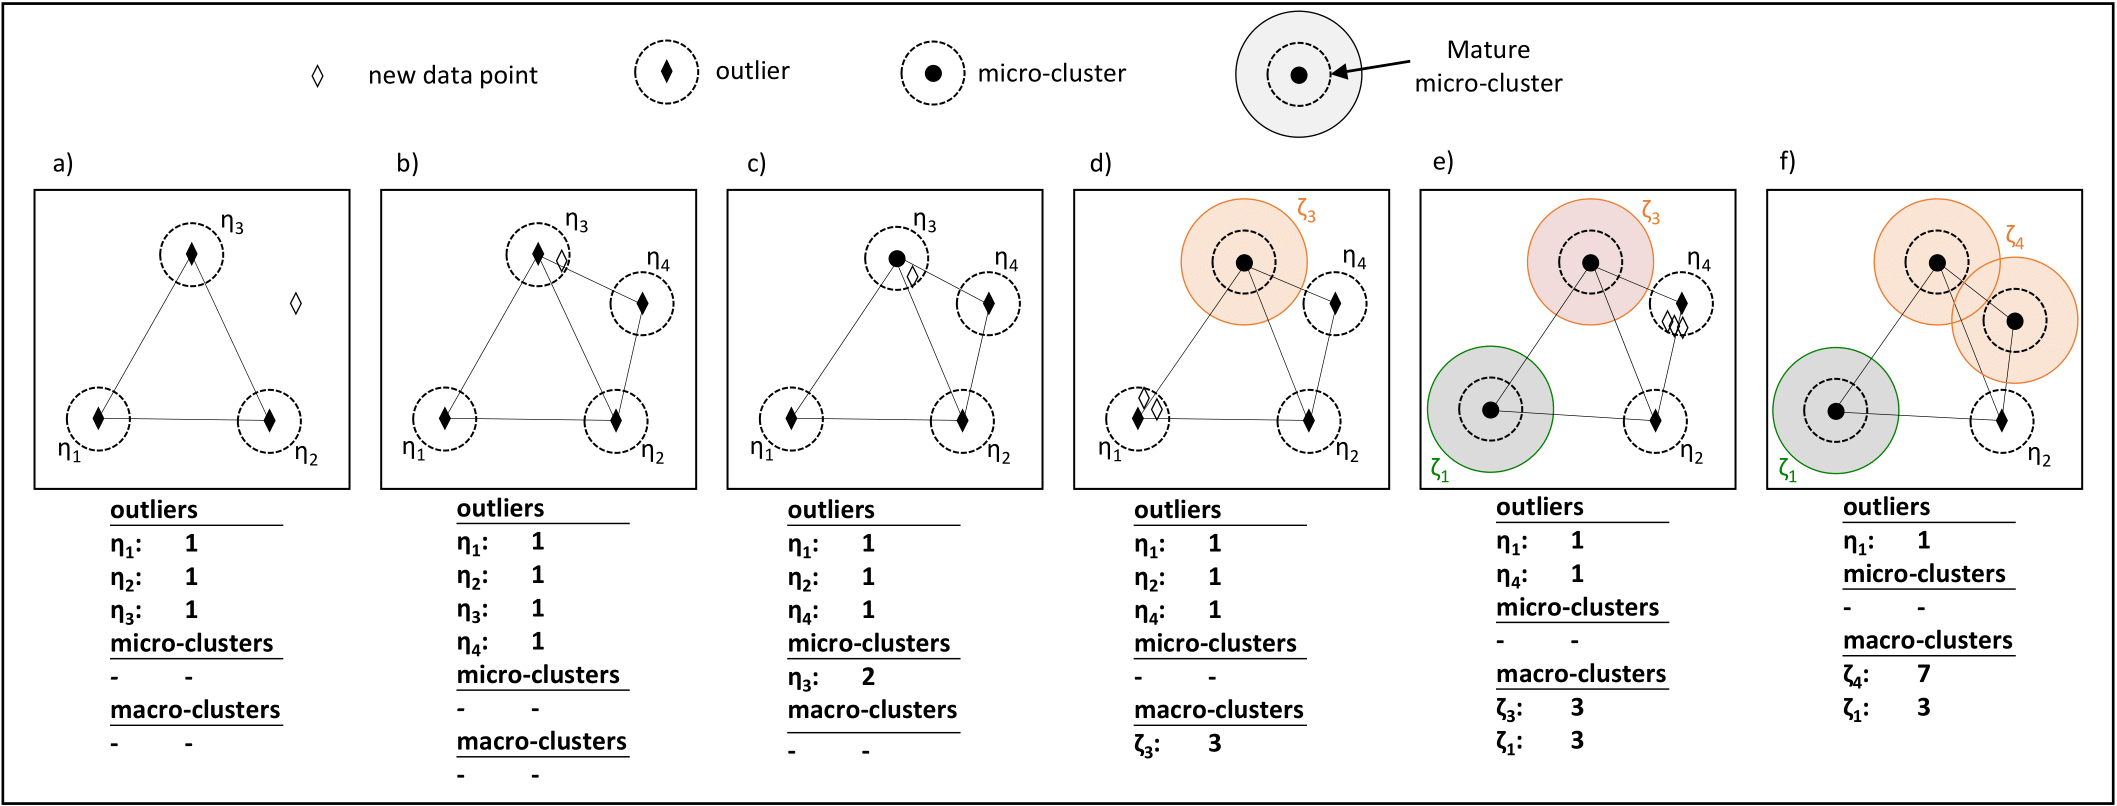

In [78]:
from IPython.display import Image
Image("dedasc_flow.png")

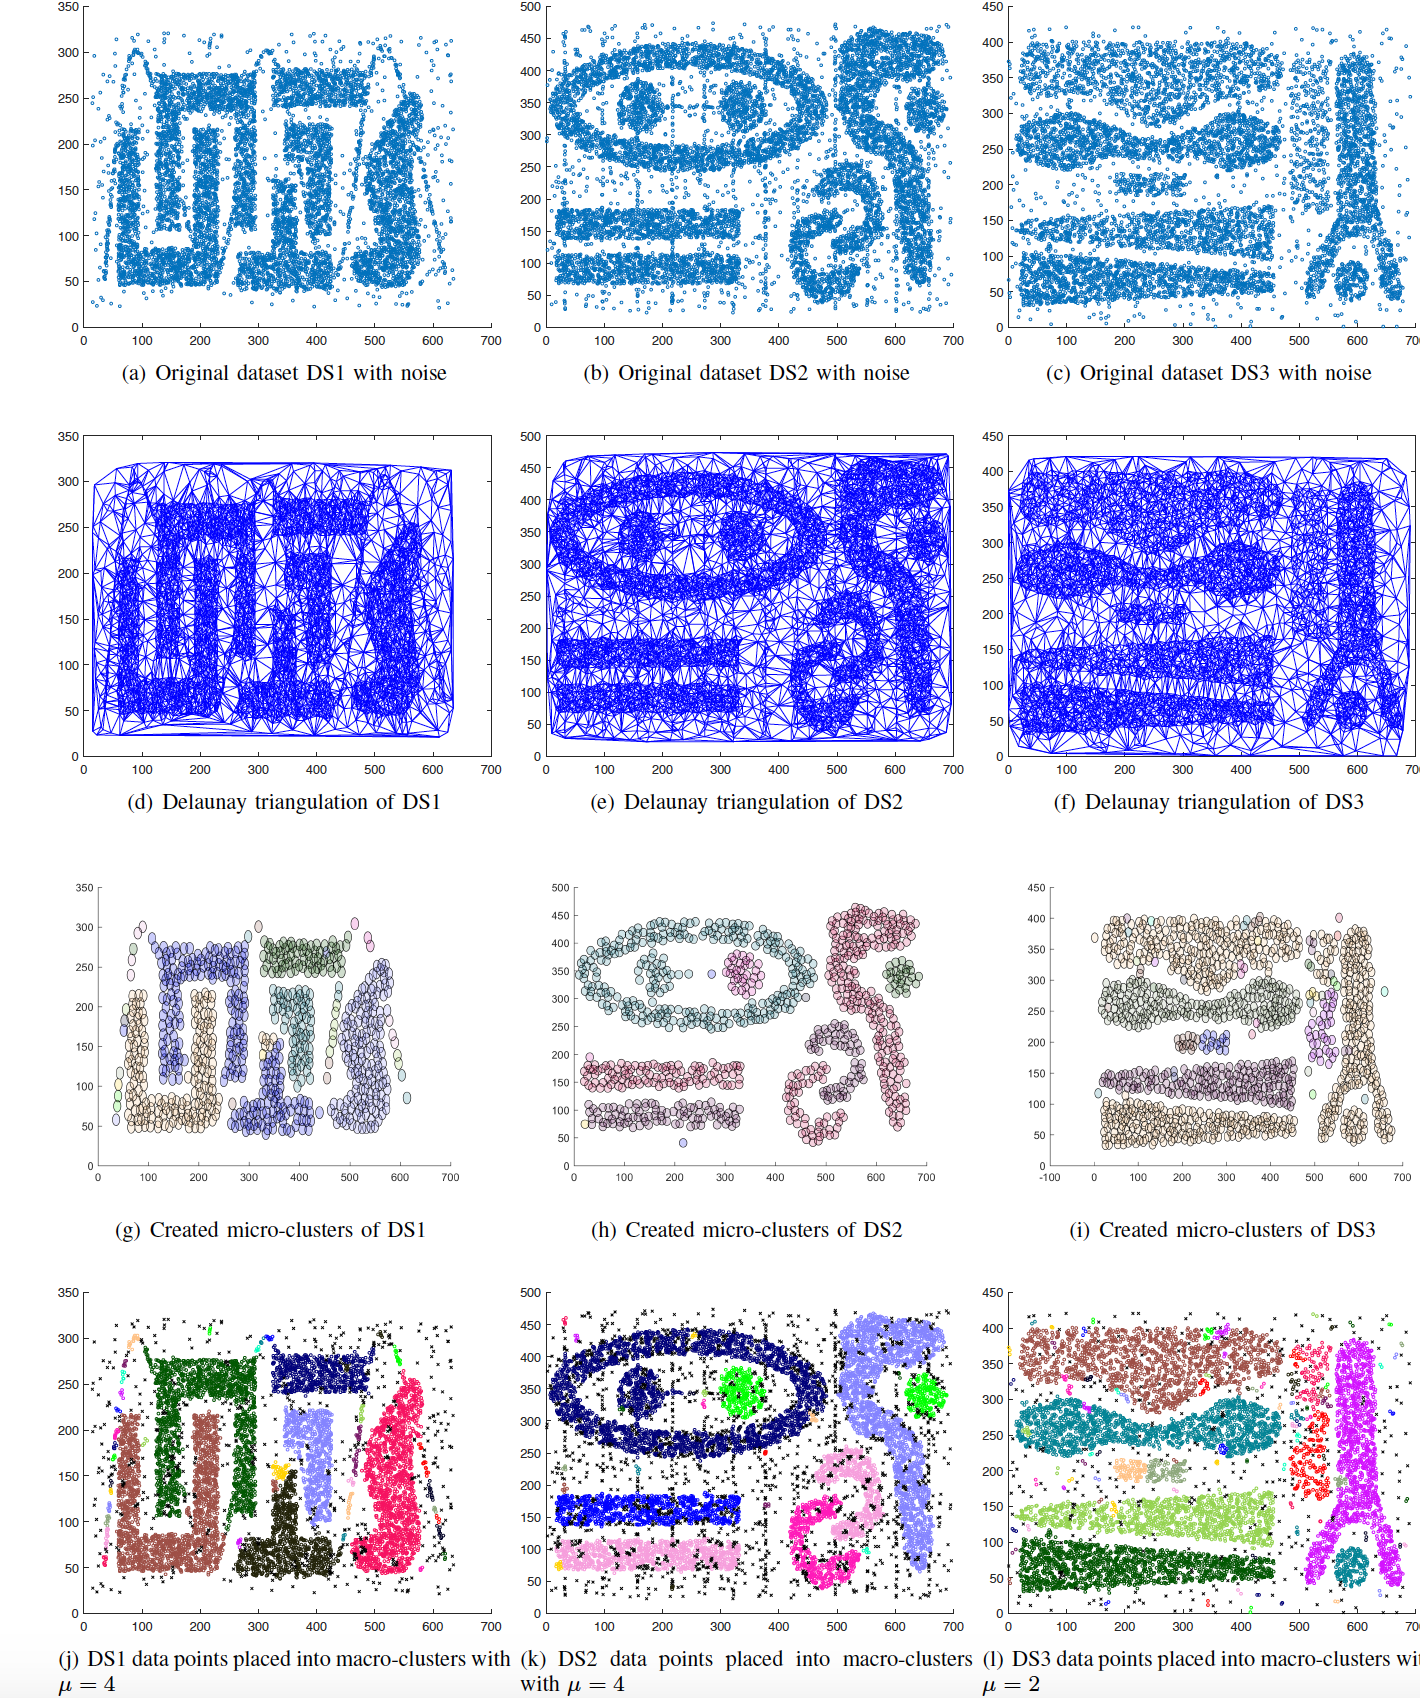

In [79]:
from IPython.display import Image
Image("dedasc_exp.png")

# Thank you